In [1]:
#!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost statsmodels

In [2]:
# =============================================================================
# STEP 1: DATA CLEANING & PREPROCESSING
# =============================================================================


In [3]:
#importing necessory libraries
import pandas as pd
import numpy as np

In [4]:
# Loading dataset
df = pd.read_csv("C:/Users/1997a/OneDrive/Desktop/DS-CW1/House_pricing.csv")


In [5]:
# Initial Inspection
# -------------------------
display(df.head())
display(df.info())
display(df.isnull().sum())

,Date,crime_rate,renovation_level,Year,Address,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,specifications
0,2009-01-02-00:00:00,2.6568262407789027,Minor,2009,40 ETTL LN UT 24,Two rooms,Condo,Mediocre,760.0,19.0,Scattered,1.025953,6.586707,Greenwich,Condominium,711270.0,975000.0,"In 2009, this condo located in Greenwich at 40..."
1,2009-01-02-00:00:00,5.328727031244374,Basic,2009,18 BAUER RD,Three rooms,Single Family,Superb,7967.337677159014,17.0,Extensive,1.025953,8.224127,East Hampton,Detached House,119970.0,189900.0,"In 2009, this single family located in East Ha..."
2,2009-01-02-00:00:00,4.037758682930219,Basic,2009,48 HIGH VALLEY RD.,Three rooms,Single Family,Satisfactory,982.0,1.0,Accessible,1.025953,8.019369,Ridgefield,Detached House,494530.0,825000.0,"In 2009, this single family located in Ridgefi..."
3,2009-01-02-00:00:00,2.085308997846847,Extensive,2009,56 MERIDEN RD,Three rooms,Single Family,Superb,976.0,5.0,Insufficient,1.025953,6.175522,Old Lyme,Detached House,197600.0,450000.0,"In 2009, this single family located in Old Lym..."
4,2009-01-02-00:00:00,7.2401371952904325,Minor,2009,105 STATE AVE,Three rooms,Single Family,Outstanding,1084.0,8.0,Abundant,1.025953,9.701621,Killingly,Detached House,53330.0,70000.0,"In 2009, this single family located in Killing..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47698 entries, 0 to 47697
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           47698 non-null  object 
 1   crime_rate                     47698 non-null  object 
 2   renovation_level               47698 non-null  object 
 3   Year                           47698 non-null  int64  
 4   Address                        47698 non-null  object 
 5   num_rooms                      47698 non-null  object 
 6   Property                       47698 non-null  object 
 7   amenities_rating               47698 non-null  object 
 8   carpet_area                    47698 non-null  object 
 9   nearby_restaurants             47698 non-null  float64
 10  public_transport_availability  47698 non-null  object 
 11  property_tax_rate              47698 non-null  object 
 12  distance_to_school             47698 non-null 

None

Date                             0
crime_rate                       0
renovation_level                 0
Year                             0
Address                          0
num_rooms                        0
Property                         0
amenities_rating                 0
carpet_area                      0
nearby_restaurants               0
public_transport_availability    0
property_tax_rate                0
distance_to_school               0
Locality                         0
Residential                      0
Estimated Value                  0
Sale Price                       0
specifications                   0
dtype: int64

In [6]:
# Data Cleaning
# -------------------------
# Removing extra spaces and converting Date column into datetime
df['Date'] = df['Date'].str.strip()
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
#removing time portion
df['Date'] = df['Date'].dt.date

In [7]:
# Converting'crime_rate' column: first, convert to string, strip, then replace non-numeric values with NaN,
# and finally convert to numeric. Then fill NaN with the median.
df['crime_rate'] = df['crime_rate'].astype(str).str.strip().replace(
    ["Not Provided", "not provided", "NOT PROVIDED", "N/A", "-", "Unknown"], np.nan
)
df['crime_rate'] = pd.to_numeric(df['crime_rate'], errors='coerce')
df['crime_rate'] = df['crime_rate'].fillna(df['crime_rate'].median())

In [8]:
# Replacing non-numeric strings in 'carpet_area' 
df['carpet_area'] = df['carpet_area'].replace('Not Provided', np.nan).astype('float')
df['carpet_area'] = df['carpet_area'].fillna(df['carpet_area'].median())

In [9]:
# Replacing non-numeric strings in 'property_tax_rate'
df['property_tax_rate'] = df['property_tax_rate'].replace('Not Provided', np.nan).astype('float')
df['property_tax_rate'] = df['property_tax_rate'].fillna(df['property_tax_rate'].median())


In [10]:
# Feature Encoding
# -------------------------
# Map renovation_level (Label Encoding)
renovation_mapping = {
    'Minor': 1, 'Basic': 2, 'Limited': 3, 'Essential': 4, 'Partial': 5,
    'Standard': 6, 'Advanced': 7, 'Extensive': 8, 'Complete': 9, 'Premium': 10
}
df['renovation_level'] = df['renovation_level'].map(renovation_mapping)


In [11]:
# Converting 'num_rooms' from text to numeric using a mapping
room_mapping = {
    'Two rooms': 2,
    'Three rooms': 3,
    'Four rooms': 4,
    'Six rooms': 6,
    'Eight rooms': 8
}
df['num_rooms'] = df['num_rooms'].map(room_mapping)

In [12]:
# Target encoding 'Property' by average Sale Price:
df['Property'] = df['Property'].map(df.groupby('Property')['Sale Price'].mean())

In [13]:
# Encoding 'amenities_rating' (Label Encoding using a mapping)
amenities_mapping = {
    'Marginal': 1, 'Unimpressive': 2, 'Below Average': 3, 'Commonplace': 4,
    'Mediocre': 5, 'Satisfactory': 6, 'Superb': 7, 'Outstanding': 8,
    'Exceptional': 9, 'Luxurious': 10
}
df['amenities_rating'] = df['amenities_rating'].map(amenities_mapping)

In [14]:
# Encoding 'public_transport_availability'
transport_mapping = {
    'Inadequate': 1, 'Sparse': 2, 'Insufficient': 3, 'Limited': 4, 'Patchy': 5,
    'Scattered': 6, 'Accessible': 7, 'Well-connected': 8, 'Extensive': 9, 'Abundant': 10
}
df['public_transport_availability'] = df['public_transport_availability'].map(transport_mapping)

In [15]:
# Target encode 'Locality' (using mean Sale Price)
locality_target_mean = df.groupby('Locality')['Sale Price'].mean()
df['Locality'] = df['Locality'].map(locality_target_mean)

In [16]:
# For Residential, replace its categorical values with target encoding based on mean sale price.
residential_target = df.groupby('Residential')['Sale Price'].mean()
df['Residential'] = df['Residential'].map(residential_target)

In [17]:
# Date & Additional Feature Extraction
# -------------------------
# Extract month from Date for time-based trends
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [18]:
# Log-Transformation for skewed variables (Sale Price & Estimated Value)
# -------------------------
# Log-transform Sale Price (and Estimated Value) to normalize right-skewed distributions
df['Sale Price'] = np.log(df['Sale Price'])
df['Estimated Value'] = np.log(df['Estimated Value'])

C:\Users\1997a\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
# Replace infinities, then fill NaNs if any
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [20]:
# Removing the unwanted columns
df.drop(columns=['Date', 'Address', 'specifications'], inplace=True)

In [21]:
#final check of cleaned data
display(df.head())
print(df.info())

,crime_rate,renovation_level,Year,num_rooms,Property,amenities_rating,carpet_area,nearby_restaurants,public_transport_availability,property_tax_rate,distance_to_school,Locality,Residential,Estimated Value,Sale Price,Month
0,2.656826,1,2009,2,265633.409853,5,760.000000,19.0,6,1.025953,6.586707,2.427900e+06,265633.409853,13.474807,13.790193,2.0
1,5.328727,2,2009,3,489173.689558,7,7967.337677,17.0,9,1.025953,8.224127,2.802406e+05,489173.689558,11.694997,12.154253,2.0
2,4.037759,2,2009,3,489173.689558,6,982.000000,1.0,7,1.025953,8.019369,8.364892e+05,489173.689558,13.111363,13.623139,2.0
3,2.085309,8,2009,3,489173.689558,7,976.000000,5.0,3,1.025953,6.175522,4.971989e+05,489173.689558,12.194000,13.017003,2.0
4,7.240137,1,2009,3,489173.689558,8,1084.000000,8.0,10,1.025953,9.701621,2.058525e+05,489173.689558,10.884254,11.156251,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47698 entries, 0 to 47697
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   crime_rate                     47698 non-null  float64
 1   renovation_level               47698 non-null  int64  
 2   Year                           47698 non-null  int64  
 3   num_rooms                      47698 non-null  int64  
 4   Property                       47698 non-null  float64
 5   amenities_rating               47698 non-null  int64  
 6   carpet_area                    47698 non-null  float64
 7   nearby_restaurants             47698 non-null  float64
 8   public_transport_availability  47698 non-null  int64  
 9   property_tax_rate              47698 non-null  float64
 10  distance_to_school             47698 non-null  float64
 11  Locality                       47698 non-null  float64
 12  Residential                    47698 non-null 

In [22]:
# Save Cleaned Data
# -------------------------
df.to_csv("House_pricing_cleaned.csv", index=False)
print("Cleaned dataset saved to House_pricing_cleaned.csv")

Cleaned dataset saved to House_pricing_cleaned.csv


In [23]:
# =============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA) 
# =============================================================================


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Set plot style
sns.set(style="whitegrid")


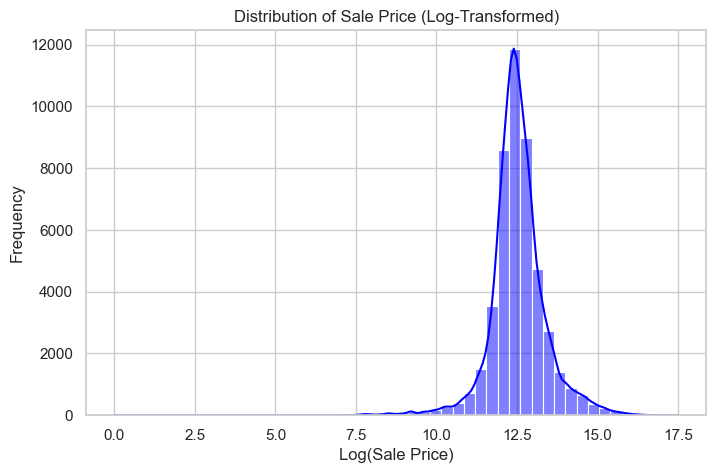

In [26]:
# A. EDA: Visualizations
# -------------------------

# Distribution of Sale Price (Log-transformed)
plt.figure(figsize=(8,5))
sns.histplot(df['Sale Price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Sale Price (Log-Transformed)')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.show()

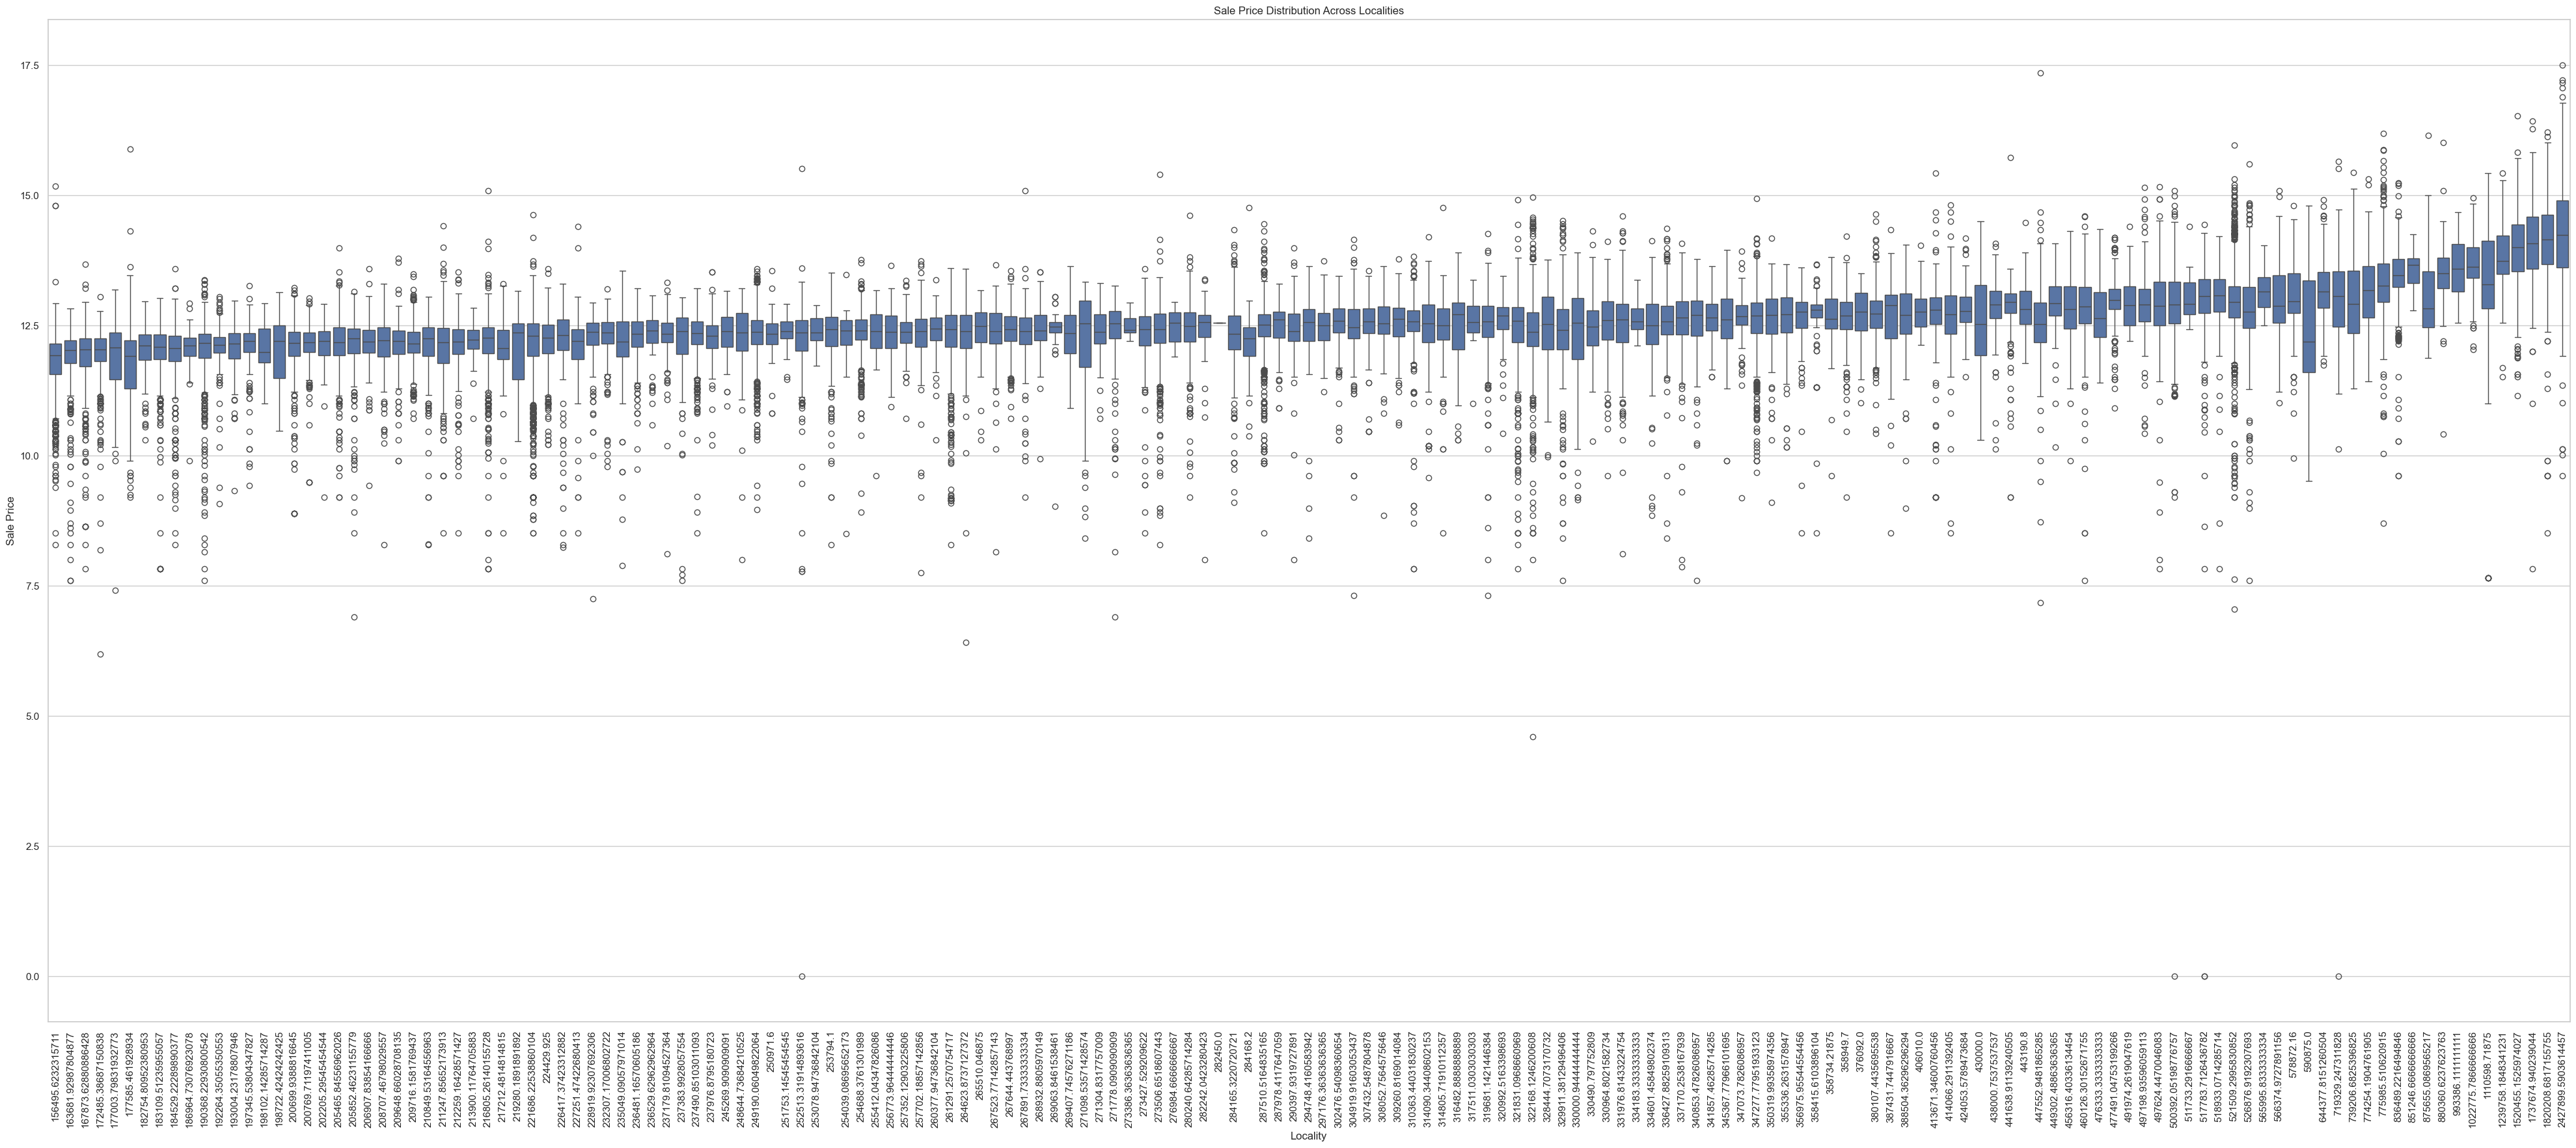

In [27]:
# Box Plot: Sale Price distribution across Localities
plt.figure(figsize=(50,20))
sns.boxplot(x='Locality', y='Sale Price', data=df)  # For palette warnings, you can later set hue='Locality'
plt.xticks(rotation=90)
plt.title("Sale Price Distribution Across Localities")
plt.show()

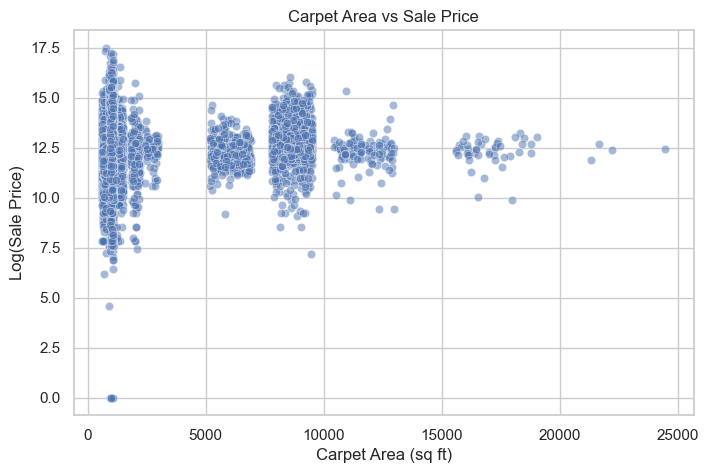

In [28]:
# Scatter Plot: Carpet Area vs Sale Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['carpet_area'].astype(float), y=df['Sale Price'], alpha=0.5)
plt.title('Carpet Area vs Sale Price')
plt.xlabel('Carpet Area (sq ft)')
plt.ylabel('Log(Sale Price)')
plt.show()

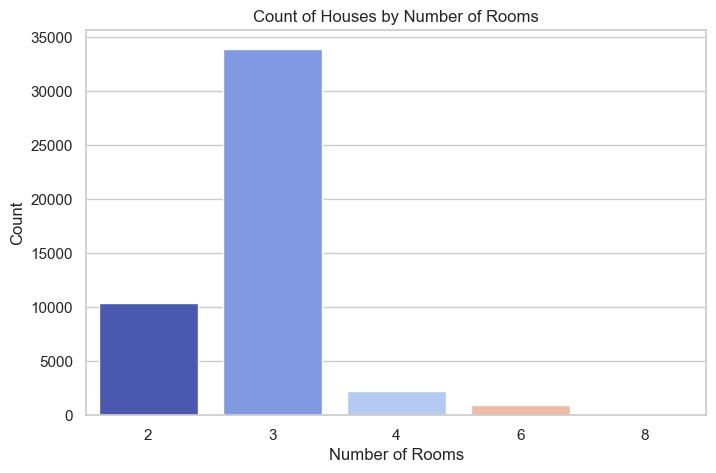

In [29]:
# Count Plot: Houses by Number of Rooms
plt.figure(figsize=(8,5))
# To avoid the palette warning, assign x to hue and then remove legend
sns.countplot(x='num_rooms', data=df, hue='num_rooms', palette="coolwarm")
plt.title("Count of Houses by Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Count")
plt.legend([],[], frameon=False)
plt.show()

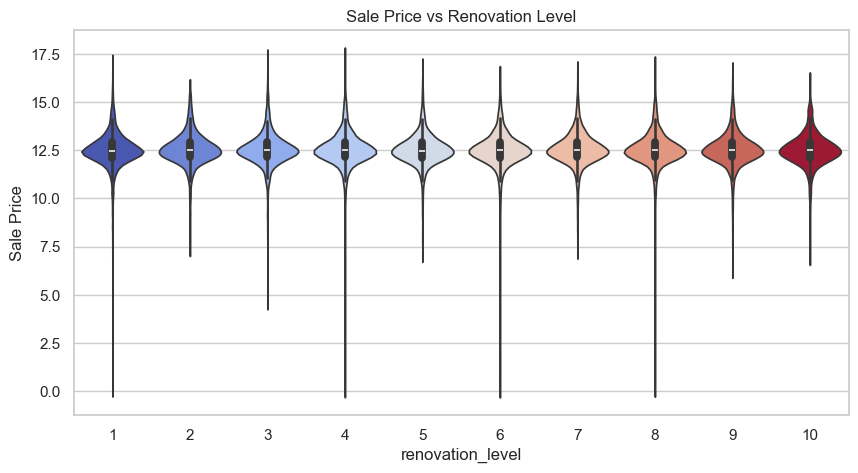

In [30]:
# Violin Plot: Sale Price vs. Renovation Level
plt.figure(figsize=(10,5))
sns.violinplot(x='renovation_level', y='Sale Price', data=df, hue='renovation_level', palette="coolwarm")
plt.title("Sale Price vs Renovation Level")
plt.legend([],[], frameon=False)
plt.show()

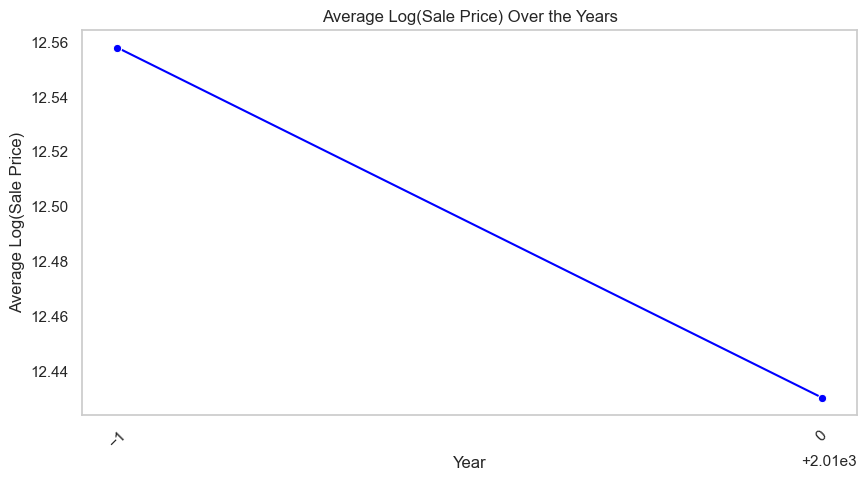

In [31]:
# Line Plot: Average Sale Price Over Years
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Sale Price', data=df, estimator='mean', errorbar=None, marker='o', color='blue')
plt.xticks(ticks=sorted(df['Year'].unique()), rotation=45)
plt.title("Average Log(Sale Price) Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Log(Sale Price)")
plt.grid()
plt.show()

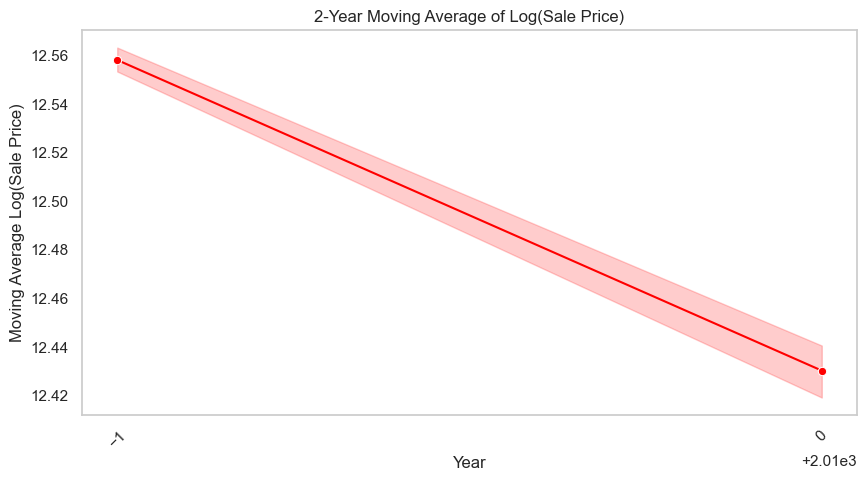

In [32]:
# Moving Average Plot: Smooth trend in Sale Price over Years
df_sorted = df.sort_values('Year')
df_sorted['Moving_Avg_Sale_Price'] = df_sorted['Sale Price'].rolling(window=3, min_periods=1).mean()
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Moving_Avg_Sale_Price', data=df_sorted, color='red', marker='o')
plt.xticks(ticks=sorted(df['Year'].unique()), rotation=45)
plt.title("2-Year Moving Average of Log(Sale Price)")
plt.xlabel("Year")
plt.ylabel("Moving Average Log(Sale Price)")
plt.grid()
plt.show()

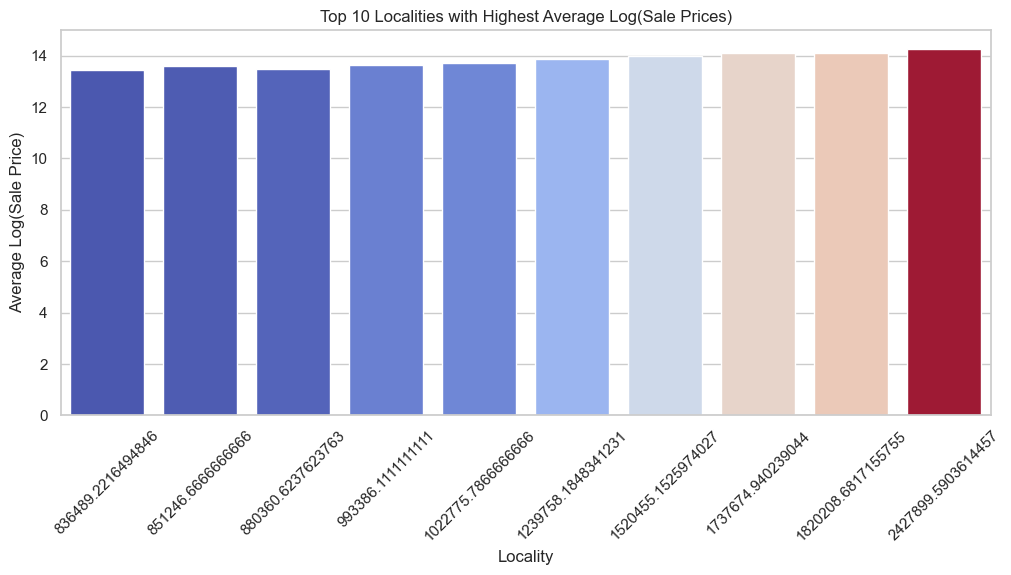

In [33]:
# Bar Plot: Top 10 Localities by Average Sale Price
top_localities = df.groupby('Locality')['Sale Price'].mean().nlargest(10).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(x='Locality', y='Sale Price', data=top_localities, hue='Locality', palette="coolwarm")
plt.title("Top 10 Localities with Highest Average Log(Sale Prices)")
plt.xlabel("Locality")
plt.ylabel("Average Log(Sale Price)")
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()

In [34]:
# =============================================================================
# STEP 3: MODEL BUILDING & EVALUATION
# =============================================================================

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [36]:
# Define an evaluation function
def evaluate(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

In [37]:
# Prepare Data for Modeling
# -------------------------
# Drop columns that won't be used. Here, we already dropped Date during cleaning for modeling.
X = df.drop(['Sale Price'], axis=1)
y = df['Sale Price']  # Note: This is log-transformed

In [38]:
# Ensure only numeric features are used. (If some columns remain as objects, convert them as needed.)
X = X.select_dtypes(include=[np.number])


In [39]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Model 1: Linear Regression (Baseline)
# -------------------------
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_eval = evaluate(y_test, lr_preds)
print("Linear Regression Evaluation:", lr_eval)

Linear Regression Evaluation: {'RMSE': 0.5936126178333537, 'MAE': 0.3641758346822408, 'R2': 0.5326745632068746}


In [41]:
# Model 2: XGBoost
# -------------------------
import xgboost as xgb
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_eval = evaluate(y_test, xgb_preds)
print("XGBoost Evaluation:", xgb_eval)

XGBoost Evaluation: {'RMSE': 0.5306172673171021, 'MAE': 0.28765670893433676, 'R2': 0.6265986098889201}


In [42]:
# Hyperparameter Tuning for XGBoost using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best XGBoost CV R2:", grid.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost CV R2: 0.6303875850640475


In [43]:
# Use the best estimator's predictions for final evaluation:
xgb_tuned_preds = grid.predict(X_test)
xgb_tuned_eval = evaluate(y_test, xgb_tuned_preds)
print("Tuned XGBoost Evaluation:", xgb_tuned_eval)


Tuned XGBoost Evaluation: {'RMSE': 0.5188103996220775, 'MAE': 0.27716948735092156, 'R2': 0.643030986482934}


In [44]:
# Model 3: LightGBM
# -------------------------
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}
num_round = 1000
bst = lgb.train(lgb_params,
                train_data,
                num_boost_round=num_round,
                valid_sets=[train_data, test_data])
lgb_preds = bst.predict(X_test, num_iteration=bst.best_iteration if hasattr(bst, 'best_iteration') else num_round)
lgb_eval = evaluate(y_test, lgb_preds)
print("LightGBM Evaluation:", lgb_eval)


LightGBM Evaluation: {'RMSE': 0.5174588697168149, 'MAE': 0.2779780784688513, 'R2': 0.6448884121908689}


In [45]:
# Model 4: CatBoost
# -------------------------
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    verbose=100
)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)
cat_preds = cat_model.predict(X_test)
cat_eval = evaluate(y_test, cat_preds)
print("CatBoost Evaluation:", cat_eval)

0:	learn: 0.8400819	test: 0.8452337	best: 0.8452337 (0)	total: 150ms	remaining: 2m 30s
100:	learn: 0.5347773	test: 0.5359758	best: 0.5359758 (100)	total: 1.46s	remaining: 13s
200:	learn: 0.5232867	test: 0.5311299	best: 0.5311299 (200)	total: 2.74s	remaining: 10.9s
300:	learn: 0.5119568	test: 0.5260805	best: 0.5260805 (300)	total: 4.02s	remaining: 9.35s
400:	learn: 0.5031656	test: 0.5234647	best: 0.5234647 (400)	total: 5.31s	remaining: 7.92s
500:	learn: 0.4958327	test: 0.5217318	best: 0.5217318 (500)	total: 6.58s	remaining: 6.55s
600:	learn: 0.4893553	test: 0.5202515	best: 0.5202122 (596)	total: 7.86s	remaining: 5.22s
700:	learn: 0.4836799	test: 0.5192272	best: 0.5191369 (685)	total: 9.14s	remaining: 3.9s
800:	learn: 0.4784229	test: 0.5188212	best: 0.5187696 (793)	total: 10.4s	remaining: 2.59s
900:	learn: 0.4737623	test: 0.5187542	best: 0.5185299 (836)	total: 11.7s	remaining: 1.29s
999:	learn: 0.4693895	test: 0.5183547	best: 0.5183499 (995)	total: 13s	remaining: 0us

bestTest = 0.518349

In [46]:
# Model Comparison: Print all evaluation results
# -------------------------
def pretty_print_results(name, result_dict):
    print(f"\n{name} Performance:")
    for metric, value in result_dict.items():
        print(f"{metric}: {value:.4f}")

pretty_print_results("Linear Regression", lr_eval)
pretty_print_results("XGBoost", xgb_eval)
pretty_print_results("Tuned XGBoost", xgb_tuned_eval)
pretty_print_results("LightGBM", lgb_eval)
pretty_print_results("CatBoost", cat_eval)


Linear Regression Performance:
RMSE: 0.5936
MAE: 0.3642
R2: 0.5327

XGBoost Performance:
RMSE: 0.5306
MAE: 0.2877
R2: 0.6266

Tuned XGBoost Performance:
RMSE: 0.5188
MAE: 0.2772
R2: 0.6430

LightGBM Performance:
RMSE: 0.5175
MAE: 0.2780
R2: 0.6449

CatBoost Performance:
RMSE: 0.5183
MAE: 0.2765
R2: 0.6437


C:\Users\1997a\AppData\Local\Temp\ipykernel_109948\380020935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lgb_importance, y=features, palette='viridis')


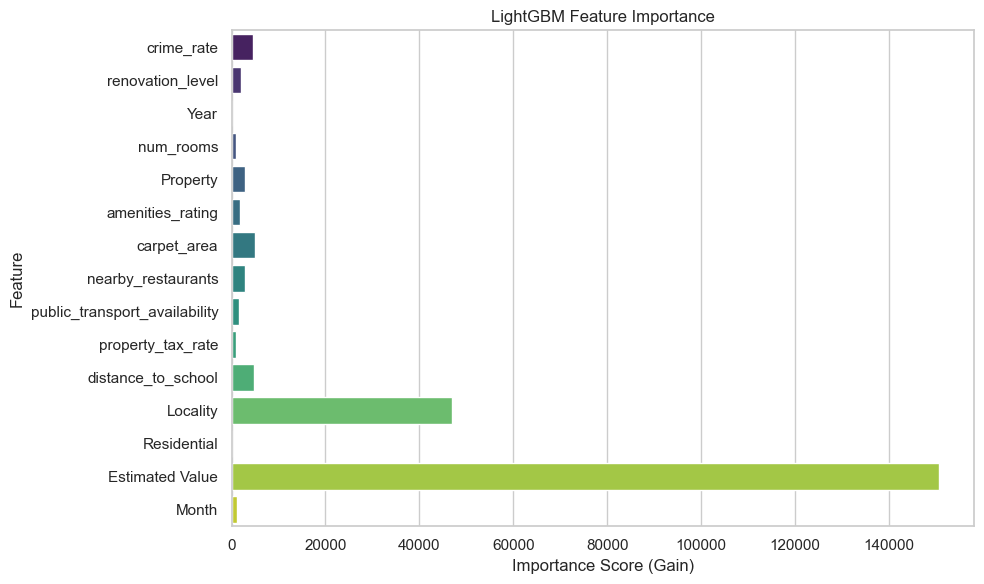

In [47]:
# LIGHTGBM: Feature Importance & Diagnostic Plots
# -------------------------
# Feature Importance for LightGBM

features = X_train.columns
lgb_importance = bst.feature_importance(importance_type='gain')  # You may also use 'split'
plt.figure(figsize=(10, 6))
sns.barplot(x=lgb_importance, y=features, palette='viridis')
plt.title("LightGBM Feature Importance")
plt.xlabel("Importance Score (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [48]:
# Predicting on test set using LightGBM
lgb_preds = bst.predict(X_test, num_iteration=bst.best_iteration if hasattr(bst, 'best_iteration') else num_round)
# Compute residuals for LightGBM
lgb_residuals = y_test - lgb_preds

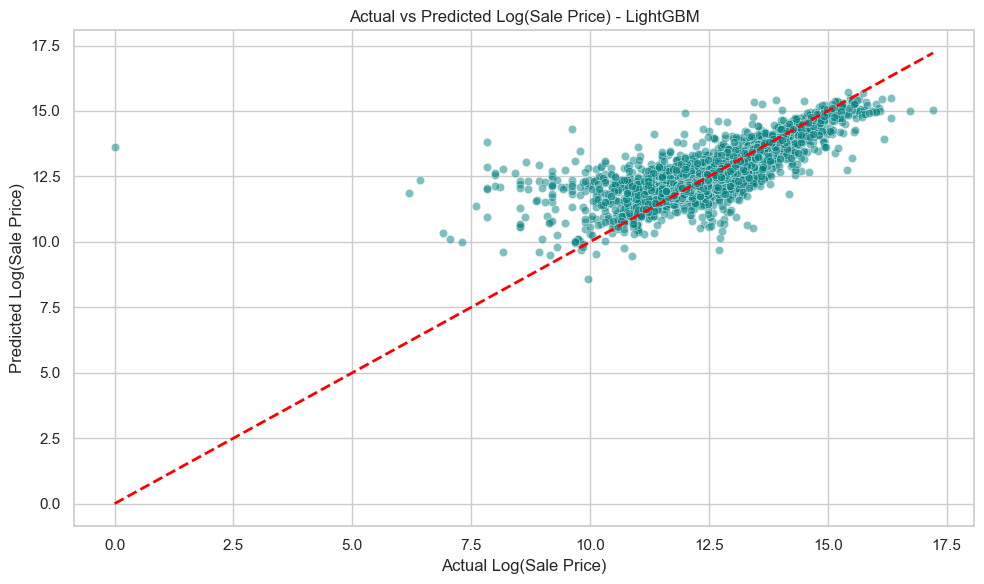

In [49]:
# Actual vs. Predicted Plot for LightGBM
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lgb_preds, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         '--', color='red', linewidth=2)
plt.title("Actual vs Predicted Log(Sale Price) - LightGBM")
plt.xlabel("Actual Log(Sale Price)")
plt.ylabel("Predicted Log(Sale Price)")
plt.grid(True)
plt.tight_layout()
plt.show()

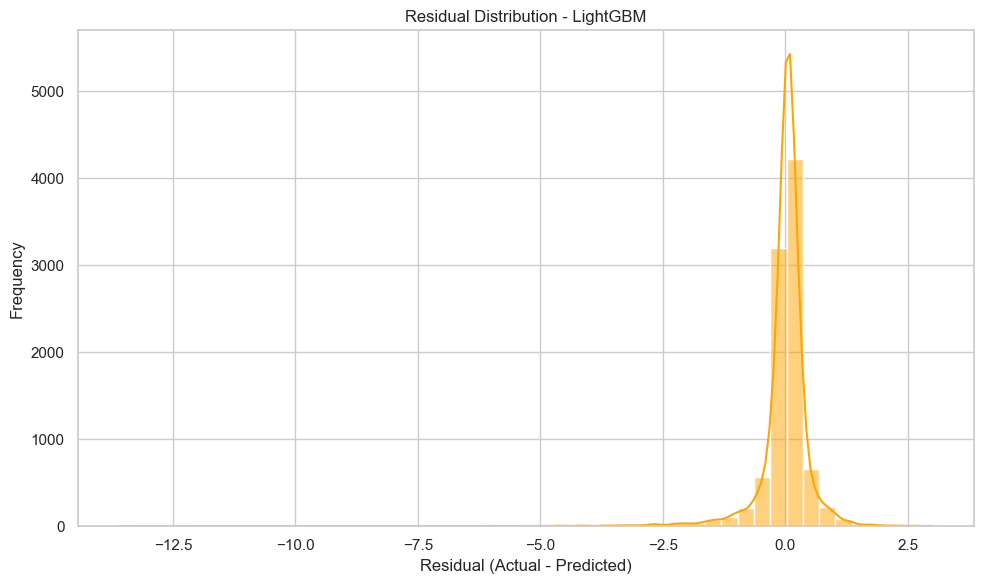

In [50]:
# Residual Analysis Plot for LightGBM
plt.figure(figsize=(10, 6))
sns.histplot(lgb_residuals, bins=50, kde=True, color='orange')
plt.title("Residual Distribution - LightGBM")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\1997a\AppData\Local\Temp\ipykernel_109948\2383577584.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_importance, y=cat_features, palette='coolwarm')


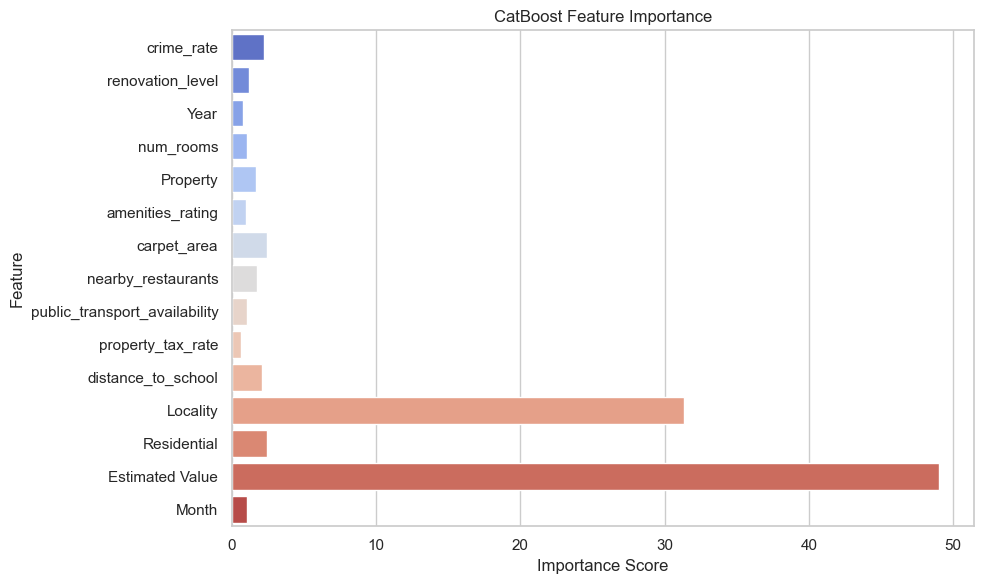

In [51]:
# CatBoost: Feature Importance & Diagnostic Plots
# -------------------------

# Feature Importance for CatBoost
cat_features = X_train.columns
cat_importance = cat_model.get_feature_importance(type="FeatureImportance")
plt.figure(figsize=(10, 6))
sns.barplot(x=cat_importance, y=cat_features, palette='coolwarm')
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [52]:
# Predict on test set using CatBoost
cat_preds = cat_model.predict(X_test)
# Compute residuals for CatBoost
cat_residuals = y_test - cat_preds

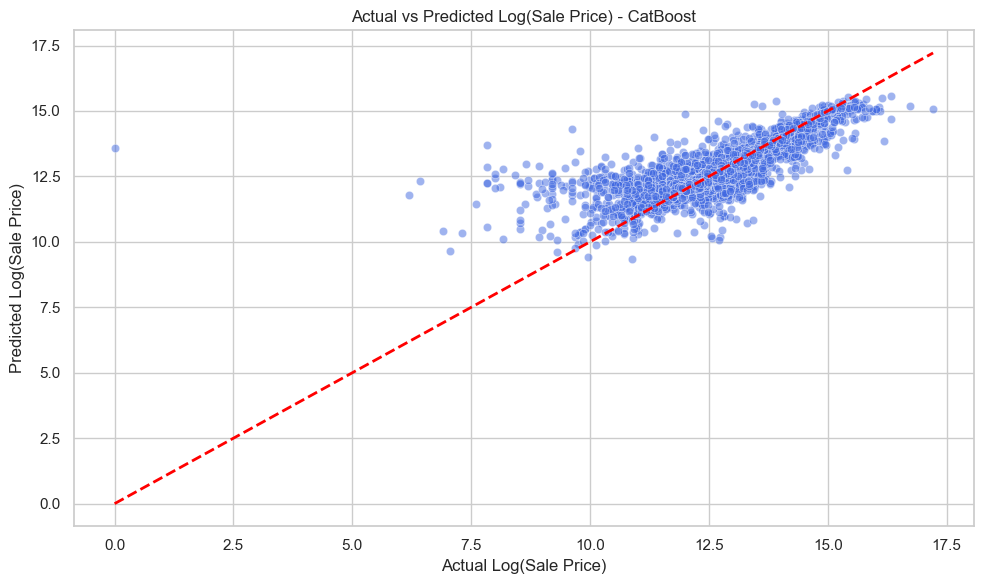

In [53]:
# Actual vs. Predicted Plot for CatBoost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=cat_preds, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         '--', color='red', linewidth=2)
plt.title("Actual vs Predicted Log(Sale Price) - CatBoost")
plt.xlabel("Actual Log(Sale Price)")
plt.ylabel("Predicted Log(Sale Price)")
plt.grid(True)
plt.tight_layout()
plt.show()

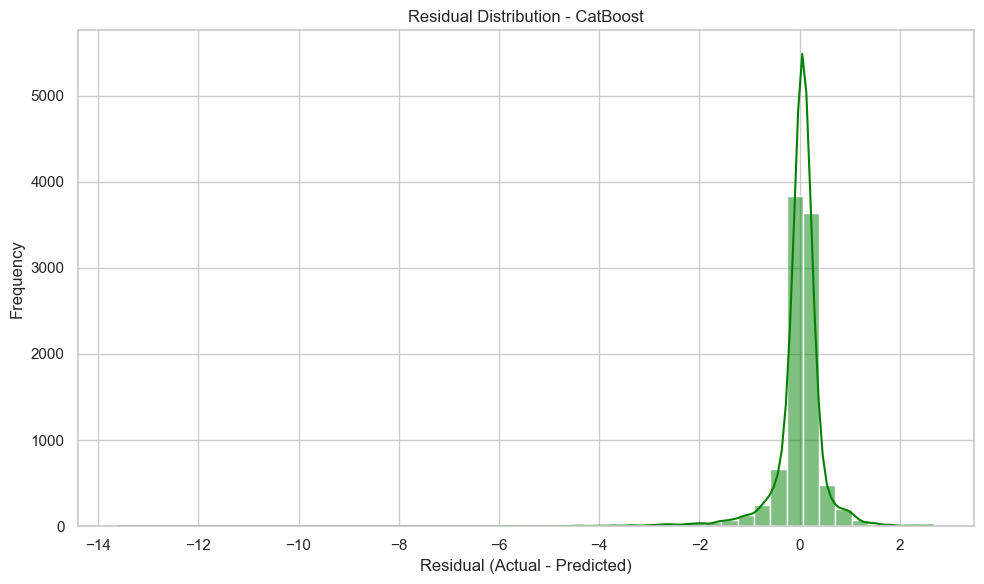

In [54]:
# Residual Analysis Plot for CatBoost
plt.figure(figsize=(10, 6))
sns.histplot(cat_residuals, bins=50, kde=True, color='green')
plt.title("Residual Distribution - CatBoost")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()